<a href="https://colab.research.google.com/github/SofiaGom/Regresion_lineal/blob/main/Act4_SG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importo las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#abro el archivo
df = pd.read_csv("/content/DF_Mexico.csv")
df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,...,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,...,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,...,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,12,3,2,0,0.46


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [ ]:
#df.isnull().sum()

In [ ]:
#elimino las columnas que son 0
columnas = ['neighbourhood_group_cleansed','bathrooms', 'calendar_updated','license' ]
df = df.drop(columns = columnas)

#Nulos

In [ ]:
#sustituir nulos
df1=df.fillna(method="bfill")
df1=df.fillna(method="ffill")

In [ ]:
#sustituyo para que no afecte posteriormente el tipo de dato
df1["host_response_rate"]= df1["host_response_rate"].replace("%","",regex=True).astype(float)
df1["host_acceptance_rate"]= df1["host_acceptance_rate"].replace("%","",regex=True).astype(float)
df1["price"] = df1["price"].str.replace('$', '').str.replace(',', '').astype(float)

<ipython-input-355-bfd742d89ddb>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1["price"] = df1["price"].str.replace('$', '').str.replace(',', '').astype(float)


In [ ]:
media = df1["host_acceptance_rate"].mean()
df1["host_acceptance_rate"].fillna(media, inplace=True)

In [ ]:
df2=df1.copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24224 non-null  object 
 6   description                                   24224 non-null  object 
 7   neighborhood_overview                         24223 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df1
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("\nLimite superior permitido", Limite_Superior_iqr)
print("\nLimite inferior permitido", Limite_Inferior_iqr)

#Obtenemos datos limpios del Dataframe
df1= df1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df1


Limite superior permitido id                                              1.690170e+18
scrape_id                                       2.023033e+13
host_id                                         6.839189e+08
host_response_rate                              1.000000e+02
host_acceptance_rate                            1.075000e+02
host_listings_count                             2.850000e+01
host_total_listings_count                       3.200000e+01
latitude                                        1.949915e+01
longitude                                      -9.911735e+01
accommodates                                    7.000000e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
price                                           3.161500e+03
minimum_nights                                  3.500000e+00
maximum_nights                                  2.542500e+03
minimum_minimum_nights                          3.500000e+

<ipython-input-359-58988a14b3ea>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile25=y.quantile(0.25) #Q1
<ipython-input-359-58988a14b3ea>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile75=y.quantile(0.75) #Q3
<ipython-input-359-58988a14b3ea>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1= df1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,NaN,20230329041210,NaN,NaN,NaN,NaN,NaN,NaN,10531228,...,5.00,4.95,5.00,4.86,NaN,3.0,3.0,0.0,0.0,0.19
1,2072354,NaN,20230329041210,NaN,NaN,NaN,NaN,NaN,NaN,16840050,...,4.93,5.00,4.95,4.84,NaN,2.0,2.0,0.0,0.0,0.54
2,696037,NaN,20230329041210,NaN,NaN,NaN,NaN,NaN,NaN,3531879,...,4.92,4.92,4.58,4.71,NaN,3.0,3.0,0.0,0.0,0.31
3,35797,NaN,20230329041210,NaN,NaN,NaN,NaN,NaN,NaN,153786,...,4.92,4.92,4.58,4.71,NaN,1.0,1.0,0.0,0.0,0.31
4,44616,NaN,20230329041210,NaN,NaN,NaN,NaN,NaN,NaN,196253,...,4.87,4.78,4.98,4.48,NaN,12.0,3.0,2.0,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,853923589855678923,NaN,20230329041210,NaN,NaN,NaN,NaN,NaN,NaN,488030249,...,5.00,5.00,5.00,5.00,NaN,2.0,2.0,0.0,0.0,1.00
24220,853966732274073000,NaN,20230329041210,NaN,NaN,NaN,NaN,NaN,NaN,506816029,...,5.00,5.00,5.00,5.00,NaN,1.0,1.0,0.0,0.0,1.00
24221,854225071295768399,NaN,20230329041210,NaN,NaN,NaN,NaN,NaN,NaN,154670560,...,5.00,5.00,5.00,5.00,NaN,1.0,0.0,1.0,0.0,1.00
24222,854247693069190865,NaN,20230329041210,NaN,NaN,NaN,NaN,NaN,NaN,7799414,...,5.00,5.00,5.00,5.00,NaN,13.0,13.0,0.0,0.0,1.00


In [ ]:
da1= df1.drop(["listing_url", "last_scraped", "source", "name", "description", "neighborhood_overview", "picture_url", "instant_bookable",
                 "host_id", "host_url", "host_name", "host_since", "host_location", "host_about", "host_response_time", "host_response_rate",
                 "host_acceptance_rate", "host_is_superhost", "host_thumbnail_url", "host_picture_url", "host_neighbourhood", "host_verifications",
                 "host_has_profile_pic", "host_identity_verified", "neighbourhood", "neighbourhood_cleansed", "property_type", "room_type","bathrooms_text",
                 "amenities","price","has_availability","calendar_last_scraped","first_review","last_review"],axis=1)
da1

,id,scrape_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,20230329041210,3.0,7.0,19.353530,-99.162990,3.0,1.0,1.0,1.0,...,4.95,5.00,4.95,5.00,4.86,3.0,3.0,0.0,0.0,0.19
1,2072354,20230329041210,3.0,3.0,19.353580,-99.169480,2.0,1.0,1.0,3.0,...,4.88,4.93,5.00,4.95,4.84,2.0,2.0,0.0,0.0,0.54
2,696037,20230329041210,4.0,4.0,19.441800,-99.184020,6.0,3.0,3.0,NaN,...,4.71,4.92,4.92,4.58,4.71,3.0,3.0,0.0,0.0,0.31
3,35797,20230329041210,1.0,1.0,19.382830,NaN,2.0,1.0,1.0,1.0,...,4.71,4.92,4.92,4.58,4.71,1.0,1.0,0.0,0.0,0.31
4,44616,20230329041210,16.0,16.0,19.411620,-99.177940,NaN,NaN,NaN,1.0,...,4.70,4.87,4.78,4.98,4.48,12.0,3.0,2.0,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,853923589855678923,20230329041210,3.0,4.0,19.396663,-99.148145,2.0,1.0,1.0,3.0,...,5.00,5.00,5.00,5.00,5.00,2.0,2.0,0.0,0.0,1.00
24220,853966732274073000,20230329041210,1.0,1.0,19.392023,-99.118722,7.0,2.0,3.0,1.0,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
24221,854225071295768399,20230329041210,1.0,6.0,19.371088,-99.190186,2.0,2.0,1.0,NaN,...,5.00,5.00,5.00,5.00,5.00,1.0,0.0,1.0,0.0,1.00
24222,854247693069190865,20230329041210,13.0,13.0,19.403792,-99.164978,2.0,1.0,1.0,1.0,...,5.00,5.00,5.00,5.00,5.00,13.0,13.0,0.0,0.0,1.00


In [ ]:
da2 = df2[["host_acceptance_rate", "host_response_rate", "price", "number_of_reviews", "review_scores_location", "review_scores_cleanliness", "availability_365", "reviews_per_month", "review_scores_communication","room_type"]]
da2

,host_acceptance_rate,host_response_rate,price,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication,room_type
0,91.289737,100.0,1434.0,21,5.00,4.95,324,0.19,4.95,Entire home/apt
1,91.289737,100.0,830.0,61,4.95,4.88,346,0.54,5.00,Entire home/apt
2,90.000000,100.0,1469.0,39,4.58,4.71,87,0.31,4.92,Entire home/apt
3,90.000000,100.0,3658.0,0,4.58,4.71,363,0.31,4.92,Entire home/apt
4,86.000000,100.0,18000.0,64,4.98,4.70,357,0.46,4.78,Entire home/apt
...,...,...,...,...,...,...,...,...,...,...
24219,100.000000,100.0,760.0,0,5.00,5.00,352,1.00,5.00,Entire home/apt
24220,100.000000,100.0,1520.0,0,5.00,5.00,365,1.00,5.00,Entire home/apt
24221,96.000000,100.0,533.0,0,5.00,5.00,180,1.00,5.00,Private room
24222,100.000000,100.0,1200.0,0,5.00,5.00,344,1.00,5.00,Entire home/apt


In [ ]:
private = da2[da2["room_type"] == "Private room"]
shared = df2[df2['room_type'] == 'Shared room']

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

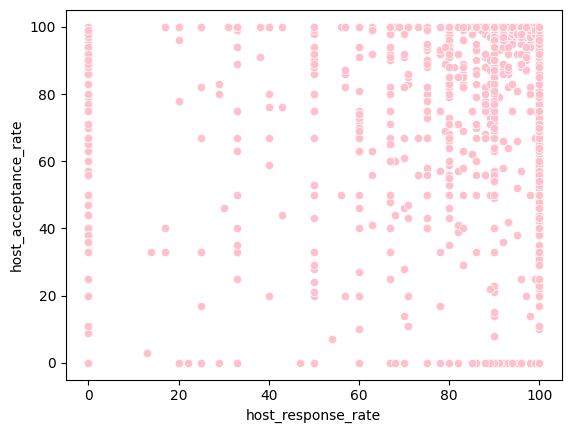

In [ ]:
from turtle import color
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="pink", data=private)

In [ ]:
Independiente = private[['host_response_rate']]
Dependiente = private['host_acceptance_rate']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Independiente , y=Dependiente)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.3747922]),
 'rank_': 1,
 'singular_': array([2130.80139075]),
 'intercept_': 53.24119420065673}

host_acceptance_rate (private) = 0.37x + 53.24

In [ ]:
coef_Deter=model.score(X=Independiente, y=Dependiente)
coef_Deter

0.11941487752518953

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

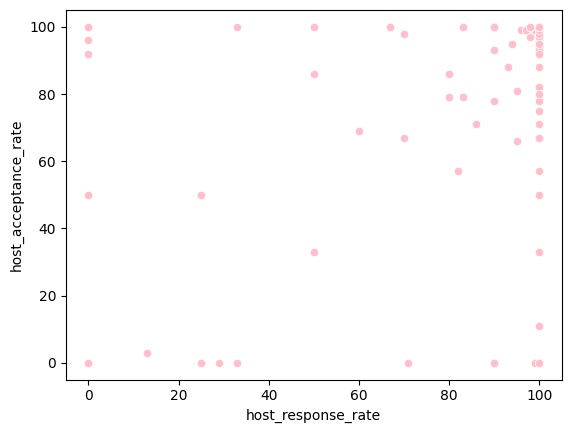

In [ ]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="pink", data=shared)

In [ ]:
Independiente = shared[['host_response_rate']]
Dependiente = shared['host_acceptance_rate']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Independiente, y=Dependiente)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.38535469]),
 'rank_': 1,
 'singular_': array([443.73282402]),
 'intercept_': 50.20285361997221}

In [ ]:
coef_Deter11=model.score(X=Independiente, y=Dependiente)
coef_Deter11

0.1359598146524228

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

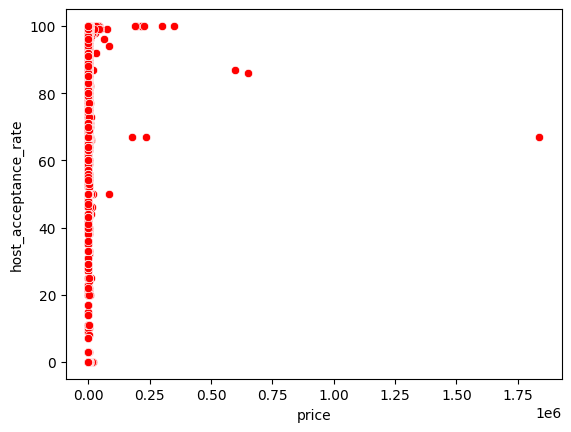

In [ ]:
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=private)

In [ ]:
Independiente= private[['price']]
Dependiente= private['host_acceptance_rate']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Independiente, y=Dependiente)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-4.58512387e-06]),
 'rank_': 1,
 'singular_': array([2160830.41606824]),
 'intercept_': 87.3662175450093}

host_acceptance_rate (private) = -4.59x + 87.36

In [ ]:
coef_Deter2=model.score(X=Independiente, y=Dependiente)
coef_Deter2

1.8379551628644464e-05

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

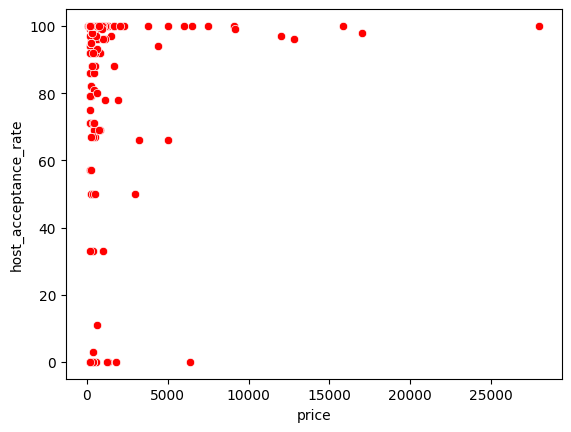

In [ ]:
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=shared)

In [ ]:
Independiente= shared[['price']]
Dependiente= shared['host_acceptance_rate']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Independiente, y=Dependiente)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.0007114]),
 'rank_': 1,
 'singular_': array([43699.26481985]),
 'intercept_': 83.11652894771984}

host_acceptance_rate (shared) = 0.0007x + 83.12

In [ ]:
coef_Deter22=model.score(X=Independiente, y=Dependiente)
coef_Deter22

0.004493855318530637

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

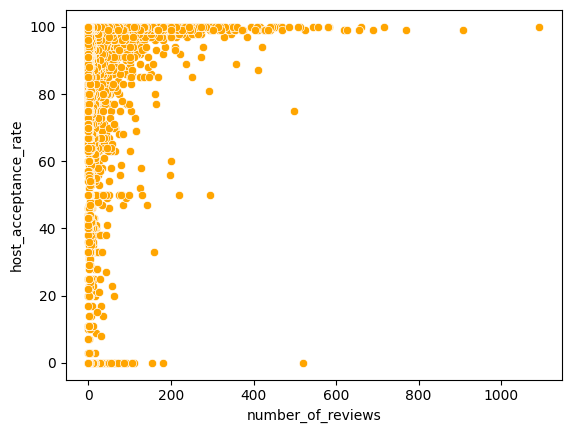

In [ ]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="orange", data=private)

In [ ]:
Independiente = private[['number_of_reviews']]
Dependiente = private['host_acceptance_rate']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Independiente, y=Dependiente)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.05583141]),
 'rank_': 1,
 'singular_': array([5203.65954966]),
 'intercept_': 85.91439095508184}

host_acceptance_rate (private) = 0.05x + 85.91

In [ ]:
coef_Deter3=model.score(X=Independiente, y=Dependiente)
coef_Deter3

0.015803973796510218

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

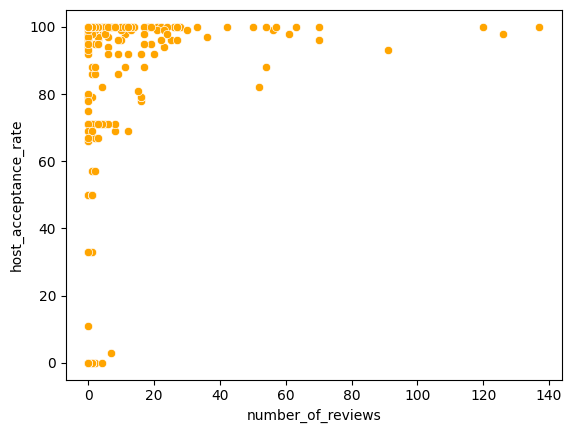

In [ ]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate',color="orange", data=shared)

In [ ]:
Independiente = shared[['number_of_reviews']]
Dependiente = shared['host_acceptance_rate']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Independiente, y=Dependiente)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.29904021]),
 'rank_': 1,
 'singular_': array([309.01946657]),
 'intercept_': 81.25892792490833}

host_acceptance_rate (shared) = 0.299x + 81.26

In [ ]:
coef_Deter33=model.score(X=Independiente, y=Dependiente)
coef_Deter33

0.039707907678485754

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

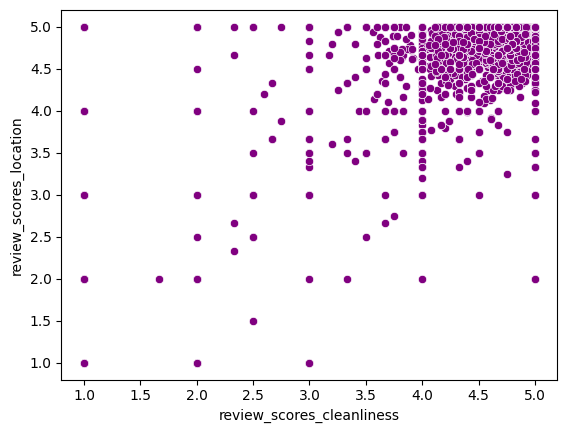

In [ ]:
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="purple", data=private)

In [ ]:
Independiente = private[['review_scores_cleanliness']]
Dependiente = private['review_scores_location']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Independiente, y=Dependiente)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.64595306]),
 'rank_': 1,
 'singular_': array([49.57506174]),
 'intercept_': 1.765208445014344}

review_scores_location (private) = 0.64x + 1.77

In [ ]:
coef_Deter4=model.score(X=Independiente, y=Dependiente)
coef_Deter4

0.5411401738683872

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

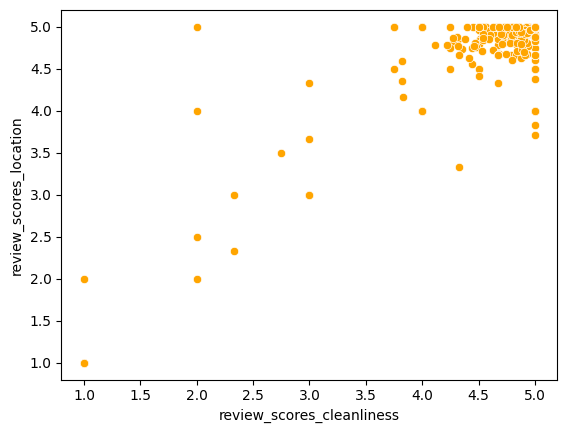

In [ ]:
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location',color="orange", data=shared)

In [ ]:
Independiente = shared[['review_scores_cleanliness']]
Dependiente = shared['review_scores_location']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Independiente, y=Dependiente)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.82463925]),
 'rank_': 1,
 'singular_': array([14.4909896]),
 'intercept_': 0.926344981696114}

review_scores_location (shared) = 0.82x + 0.93

In [ ]:
coef_Deter44=model.score(X=Independiente, y=Dependiente)
coef_Deter44

0.7791589389989577

review_scores_location

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

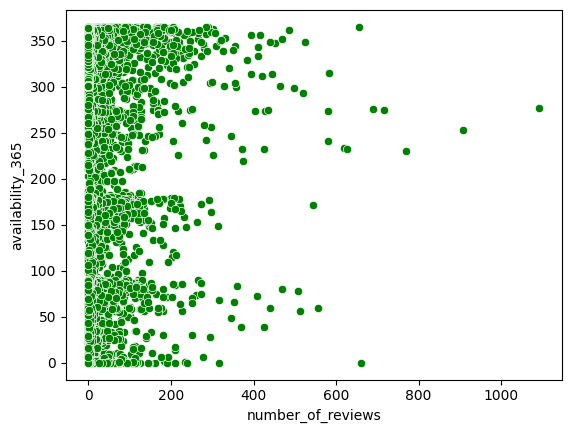

In [ ]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color="green", data=private)

In [ ]:
Independiente= private[['number_of_reviews']]
Dependiente= private['availability_365']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Independiente, y=Dependiente)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.09364539]),
 'rank_': 1,
 'singular_': array([5203.65954966]),
 'intercept_': 255.47449731231168}

In [ ]:
coef_Deter5=model.score(X=Independiente, y=Dependiente)
coef_Deter5

0.001848740094272383

availability ( private) = -0.09x + 255.48

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

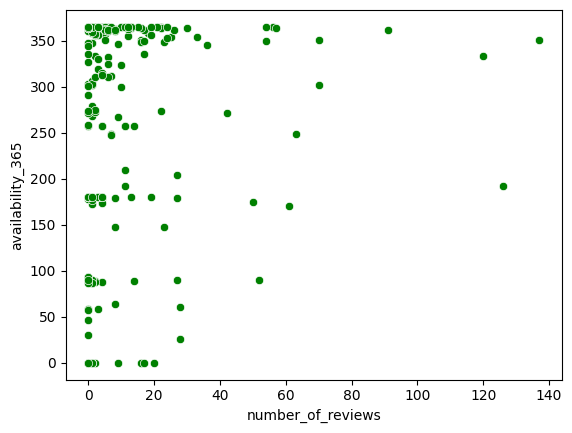

In [ ]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color ="green", data=shared)

In [ ]:
Independiente = shared[['number_of_reviews']]
Dependiente = shared['availability_365']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Independiente, y=Dependiente)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.22117208]),
 'rank_': 1,
 'singular_': array([309.01946657]),
 'intercept_': 297.8061064299387}

In [ ]:
coef_Deter55=model.score(X=Independiente, y=Dependiente)
coef_Deter55

0.0013880801890647776

availiability = -0.22x + 297.81

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

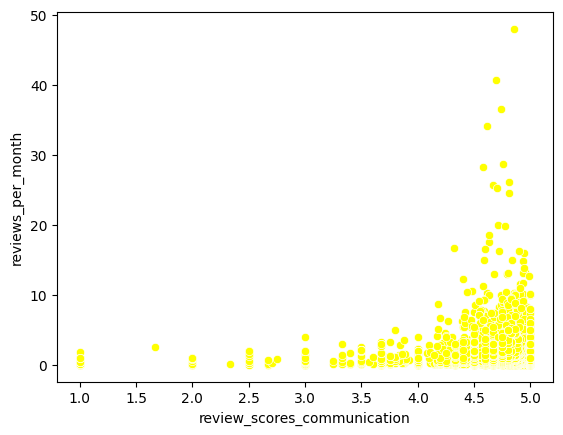

In [ ]:
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color ="yellow", data=private)

In [ ]:
Independiente= private[['review_scores_communication']]
Dependiente = private['reviews_per_month']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Independiente, y=Dependiente)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.19186247]),
 'rank_': 1,
 'singular_': array([48.27812325]),
 'intercept_': 0.48394579084360057}

In [ ]:
coef_Deter6=model.score(X=Independiente, y=Dependiente)
coef_Deter6

0.002548313424778015

review_per_month (private) = 0.19x + 0.48

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

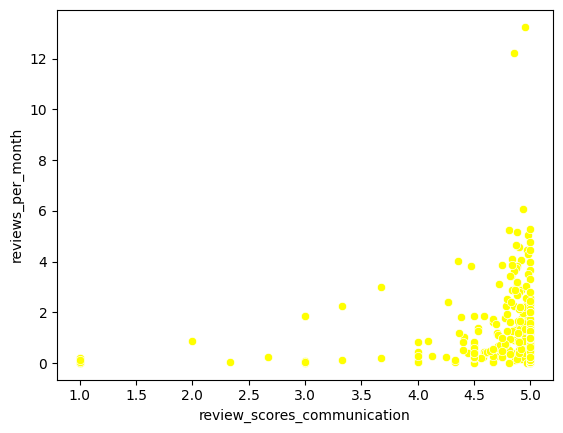

In [ ]:
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="yellow", data=shared)

In [ ]:
Independiente = shared[['review_scores_communication']]
Dependiente = shared['reviews_per_month']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Independiente , y=Dependiente )
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.29703603]),
 'rank_': 1,
 'singular_': array([14.44939766]),
 'intercept_': -0.17401599585910565}

In [ ]:
coef_Deter66=model.score(X=Independiente, y=Dependiente)
coef_Deter66

0.02479876952277027

reviews_per_month (shared) = 0.29x -0.17

In [401]:
datos = {
    'coef': ['coef_Deter', 'coef_Deter11', 'coef_Deter2','coef_Deter22', 'coef_Deter3', 'coef_Deter33', 'coef_Deter4', 'coef_Deter44', 'coef_Deter5', 'coef_Deter55', 'coef_Deter6', 'coef_Deter66'],
    'coeficiente': [0.11, 0.14, 0.000018, 0.0045, 0.016, 0.039, 0.54, 0.77, 0.0019, 0.0013, 0.0025, 0.024]
}
dff = pd.DataFrame(datos)
dff

,coef,coeficiente
0,coef_Deter,0.110000
1,coef_Deter11,0.140000
2,coef_Deter2,0.000018
3,coef_Deter22,0.004500
4,coef_Deter3,0.016000
5,coef_Deter33,0.039000
6,coef_Deter4,0.540000
7,coef_Deter44,0.770000
8,coef_Deter5,0.001900
9,coef_Deter55,0.001300
